In [182]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
data_path = r"/home/ubuntu/SMRR/garfield_tasks/Rx_build/fit_results.txt"
data = np.genfromtxt(data_path, skip_header=1)

In [ ]:
E = data.T[0]
A = data.T[1]
C = data.T[2]
C_err = data.T[3]
S = data.T[4]

A_ar = data.T[1]
C_ar = data.T[2]
C_err_ar = data.T[3]
S_ar = data.T[4]

In [217]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

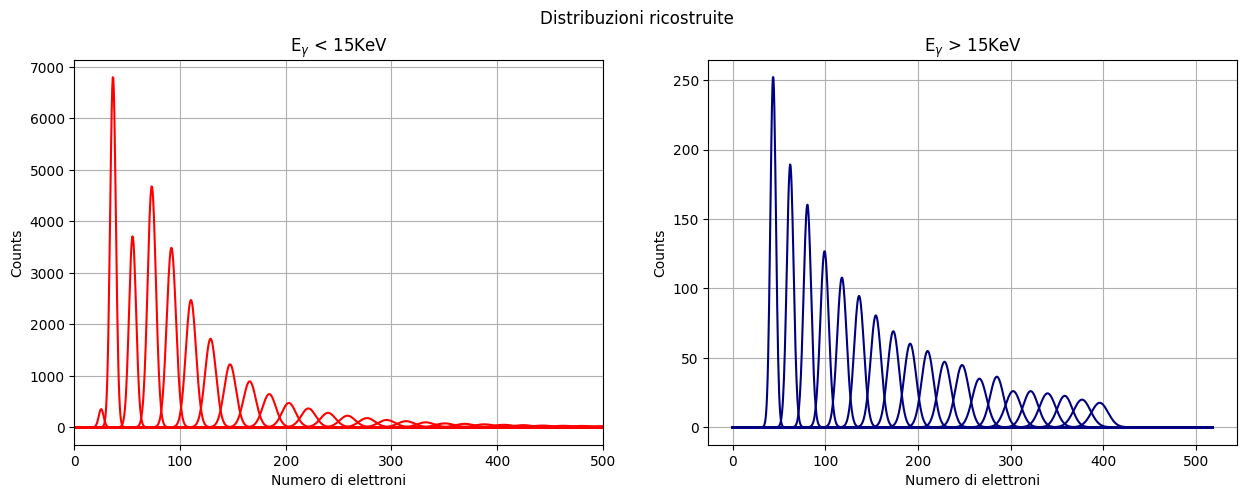

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
x_plot = np.linspace(0, max(C), 1000)

for egamma, a, mu, sigma in zip(E, A, C, S):
    y = gauss(x_plot, a, mu, sigma)
    if egamma>15000:
        axs[1].plot(x_plot, y, label=f'{egamma} eV', color='navy') 
        #axs[1].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)   
    else:
        axs[0].plot(x_plot, y, label=f'{egamma} eV', color='r')
        #axs[0].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)

fig.suptitle("Distribuzioni ricostruite")
axs[0].set_title(r"E$_\gamma$ < 15KeV")
axs[1].set_title(r"E$_\gamma$ > 15KeV")
axs[0].set_xlabel('Numero di elettroni')
axs[0].set_ylabel('Counts')
axs[1].set_xlabel('Numero di elettroni')
axs[1].set_ylabel('Counts')
axs[0].set_xlim(0, 500)
axs[0].set_xlim(0, 500)
axs[0].grid()
axs[1].grid()
#plt.savefig('hElectronsEnergy_python.png', dpi=300)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
x_plot = np.linspace(0, max(C_ar), 1000)

for egamma, a, mu, sigma in zip(E, A, C, S):
    y = gauss(x_plot, a, mu, sigma)
    if egamma>15000:
        axs[1].plot(x_plot, y, label=f'{egamma} eV', color='navy') 
        #axs[1].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)   
    else:
        axs[0].plot(x_plot, y, label=f'{egamma} eV', color='r')
        #axs[0].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)

fig.suptitle("Distribuzioni ricostruite")
axs[0].set_title(r"E$_\gamma$ < 15KeV")
axs[1].set_title(r"E$_\gamma$ > 15KeV")
axs[0].set_xlabel('Numero di elettroni')
axs[0].set_ylabel('Counts')
axs[1].set_xlabel('Numero di elettroni')
axs[1].set_ylabel('Counts')
axs[0].set_xlim(0, 500)
axs[0].set_xlim(0, 500)
axs[0].grid()
axs[1].grid()
#plt.savefig('hElectronsEnergy_python.png', dpi=300)

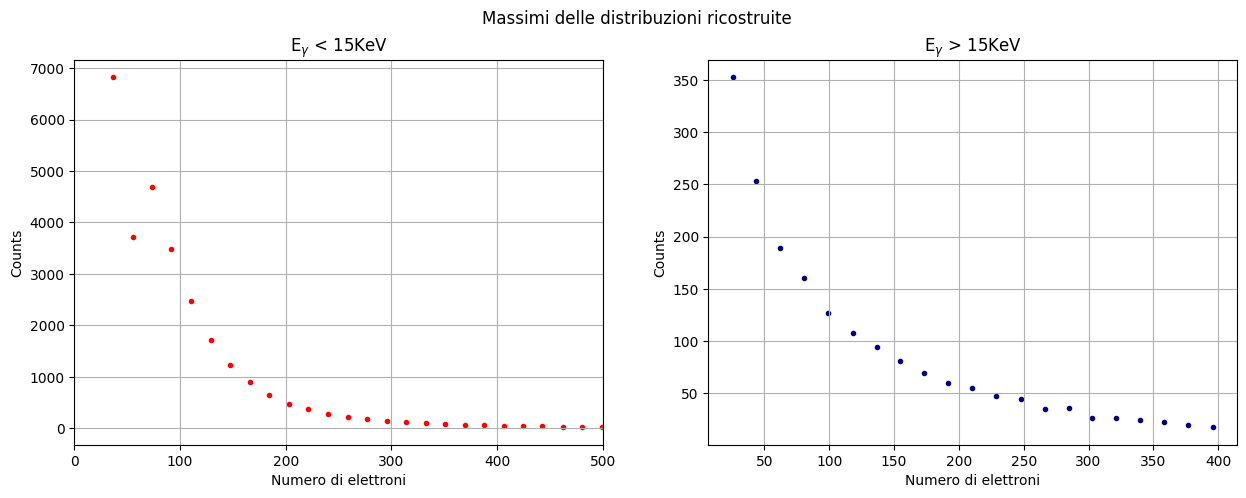

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

for egamma, a, mu, sigma in zip(E, A, C, S):
    y = gauss(x_plot, a, mu, sigma)
    if egamma>=15000:
        axs[1].scatter(mu, a, label=f'{egamma} eV', marker='.',color='navy') 
        #axs[1].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)   
    else:
        axs[0].scatter(mu, a, label=f'{egamma} eV', marker='.', color='r')
        #axs[0].axvline(mu, 0, a, color='k', linestyle='--', alpha=0.5)

fig.suptitle("Massimi delle distribuzioni ricostruite")
axs[0].set_title(r"E$_\gamma$ < 15KeV")
axs[1].set_title(r"E$_\gamma$ > 15KeV")
axs[0].set_xlabel('Numero di elettroni')
axs[0].set_ylabel('Counts')
axs[1].set_xlabel('Numero di elettroni')
axs[1].set_ylabel('Counts')
axs[0].set_xlim(0, 500)
axs[0].set_xlim(0, 500)
axs[0].grid()
axs[1].grid()
#plt.savefig('hElectronsEnergy_python.png', dpi=300)

In [189]:
print(A[E==15000]/A[E==14000])

[19.58032401]


In [190]:
from scipy.optimize import curve_fit

In [191]:
def func(x, a, b):
    return a*(x+b)

In [192]:
popt1, pcov1 = curve_fit(func, E[E < 15000], C[E < 15000], sigma=C_err[E < 15000])
popt2, pcov2 = curve_fit(func, E[E >= 15000], C[E >= 15000], sigma=C_err[E >= 15000])

In [193]:
from scipy import constants

In [198]:
hc = constants.c * constants.Planck / constants.electron_volt

In [210]:
hc

1.2398419843320026e-06

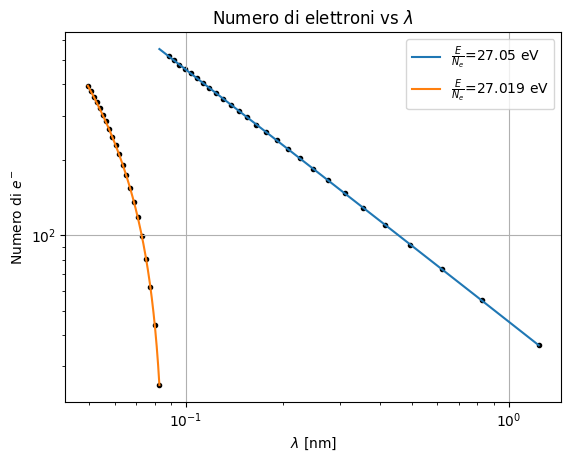

In [213]:
e_plot1 = np.linspace(min(E), 15000, 1000)
e_plot2 = np.linspace(15000, max(E), 1000)

plt.scatter(hc/E*1e9, C, marker='.', color='k')
plt.title(r"Numero di elettroni vs $\lambda$")
plt.plot(hc/e_plot1*1e9, func(e_plot1, *popt1), label=r'$\frac{E}{N_e}$='+f'{popt1[0]**(-1):.5}'+' eV')
plt.plot(hc/e_plot2*1e9, func(e_plot2, *popt2), label=r'$\frac{E}{N_e}$='+f'{popt2[0]**(-1):.5}'+' eV')
plt.xlabel(r"$\lambda$ [nm]")
plt.ylabel(r"Numero di $e^{-}$")
plt.loglog()
plt.legend()
plt.grid()

/tmp/ipykernel_2118/3684219104.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


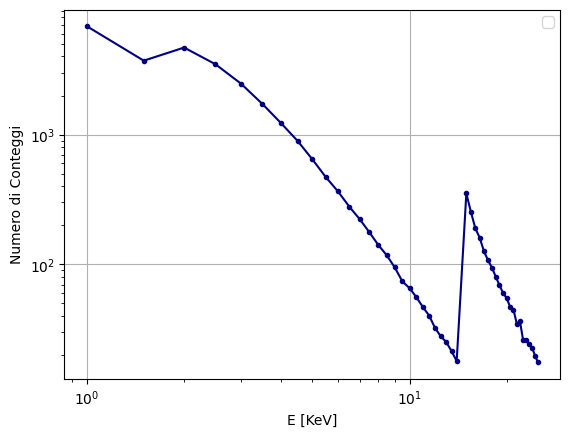

In [ ]:
plt.plot(E*1e-3, A, marker='.', color='navy')
plt.xlabel(r"E [KeV]")
plt.ylabel(r"Numero di Conteggi")
plt.loglog()
plt.legend()
plt.grid()

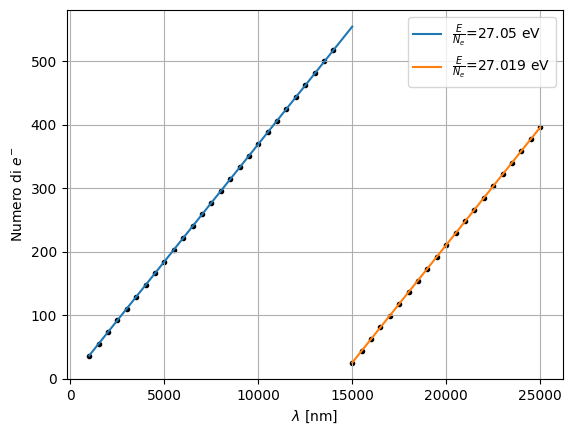

In [197]:
plt.scatter(E, C, marker='.', color='k')
plt.plot(e_plot1, func(e_plot1, *popt1), label=r'$\frac{E}{N_e}$='+f'{popt1[0]**(-1):.5}'+' eV')
plt.plot(e_plot2, func(e_plot2, *popt2), label=r'$\frac{E}{N_e}$='+f'{popt2[0]**(-1):.5}'+' eV')
plt.xlabel(r"$\lambda$ [nm]")
plt.ylabel(r"Numero di $e^{-}$")
plt.legend()
plt.grid()